In [32]:
import control

In [33]:
import jupyter_dash
from jupyter_dash import JupyterDash
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd

In [34]:
Gz = control.TransferFunction([1,0.4],[1, -1.2, 0.35], 2)
Gz

TransferFunction(array([1. , 0.4]), array([ 1.  , -1.2 ,  0.35]), 2)

In [35]:
control.feedback(Gz)

TransferFunction(array([1. , 0.4]), array([ 1.  , -0.2 ,  0.75]), 2)

In [36]:
T, yout = control.step_response(Gz)

In [37]:
list_of_tuples = list(zip(T, yout))

In [38]:
df = pd.DataFrame(list_of_tuples, columns = ['Tempo', 'Valor'])

In [39]:
df

,Tempo,Valor
0,0.0,0.000000
1,2.0,1.000000
2,4.0,2.600000
3,6.0,4.170000
4,8.0,5.494000
5,10.0,6.533300
6,12.0,7.317060
7,14.0,7.893817
8,16.0,8.311609
9,18.0,8.611095


In [40]:
fig = px.line(df, x = "Tempo", y='Valor')

In [41]:
fig

In [42]:
control.poles(Gz)

array([0.7+0.j, 0.5+0.j])

In [43]:
control.zeros(Gz)

array([-0.4+0.j])

In [44]:
import math

In [45]:
tetap1 = math.pi - math.atan((0.64/0.34))
tetap1

2.059130277851302

In [46]:
tetap2 = math.pi - math.atan((0.64/(0.5-0.36)))
tetap2

1.7861540264926346

In [47]:
tetaz1 = math.atan((0.64/(0.4+0.36)))
tetaz1

0.6998928697192437

In [48]:
tetap1 + tetap2 -tetaz1

3.1453914346246927

In [49]:
import numpy as np

In [50]:
x = np.arange(-2,2,0.1)

In [51]:
#%matplotlib widget

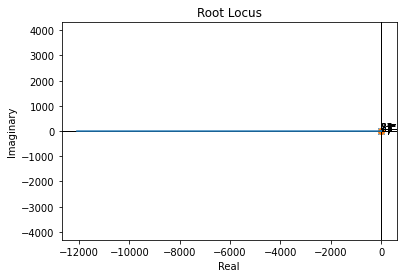

In [52]:
control.rlocus(Gz);

In [53]:
zcorte = -0.2124831 + 0.9771580j

In [54]:
abs(zcorte)

0.9999934123531065

In [55]:
zcorte.real

-0.2124831

In [56]:
rp0_7 = math.sqrt((zcorte.imag**2)+(0.7-zcorte.real)**2) 
rp0_7

1.3369604200385328

In [57]:
rp0_5 = math.sqrt((zcorte.imag**2)+(0.5-zcorte.real)**2) 
rp0_5

1.2093262275951886

In [58]:
rz0_4 = math.sqrt((zcorte.imag**2)+(0.4+zcorte.real)**2) 
rz0_4

0.9949876103498023

In [59]:
K = (rp0_5*rp0_7)/rz0_4
K

1.6249662652993846

In [60]:
T1, yout1 = control.step_response(control.feedback((K+0.1)*Gz), T = np.arange(0,1000,2))

In [62]:
import matplotlib.pyplot as plt

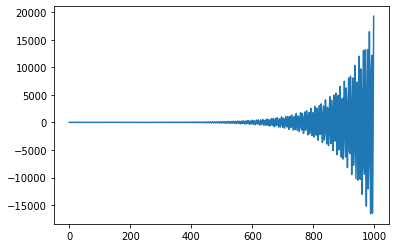

In [63]:
plt.plot(T1,yout1)

In [64]:
import matplotlib.pyplot as plt

In [65]:
list_of_tuples1 = list(zip(T1, yout1))

In [ ]:
df1 = pd.DataFrame(list_of_tuples1, columns = ['Tempo', 'Valor'])

In [ ]:
fig = px.line(df1, x = "Tempo", y='Valor')

In [ ]:
Gz

TransferFunction(array([1. , 0.4]), array([ 1.  , -1.2 ,  0.35]), 2)

In [ ]:
fig

In [ ]:
yout2, T2 = control.step_response(Gz)

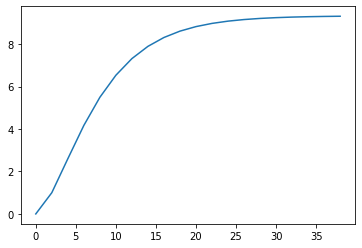

In [ ]:
plt.plot(yout2, T2)

Exercicio 2

In [66]:
Gs = control.TransferFunction([1], [2,1])
Gs

TransferFunction(array([1]), array([2, 1]))

In [68]:
Ts = 0.1
Gz = control.sample_system(Gs, Ts, 'zoh')
Gz

TransferFunction(array([0.04877058]), array([ 1.        , -0.95122942]), 0.1)

In [69]:
import harold

In [70]:
Gs1 = harold.Transfer([1], [2,1])
Gs1

Continuous-Time Transfer function
 1 input and 1 output

  Poles(real)    Poles(imag)  Zeros(real)    Zeros(imag)
-------------  -------------  -------------  -------------
         -0.5              0


In [71]:
Gz1 = harold.discretize(Gs1, Ts, method = 'zoh')

In [72]:
Gw1 = harold.undiscretize(Gz1, method = 'tustin')
Gw1.num[0][:]

array([-0.02499479,  0.49989586])

In [73]:
Gw = control.TransferFunction(Gw1.num[0], Gw1.den[0])
Gw

TransferFunction(array([-0.02499479,  0.49989586]), array([1.        , 0.49989586]))

In [74]:
youtS, TS = control.step_response(Gs)

In [75]:
youtZ, TZ = control.step_response(Gz)

In [76]:
youtW, TW = control.step_response(Gw)

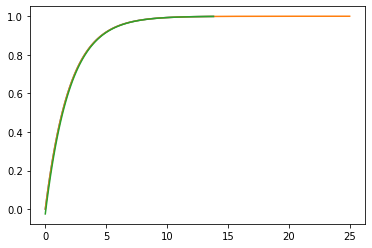

In [77]:
plt.plot(youtS, TS)
plt.plot(youtZ, TZ)
plt.plot(youtW, TW)

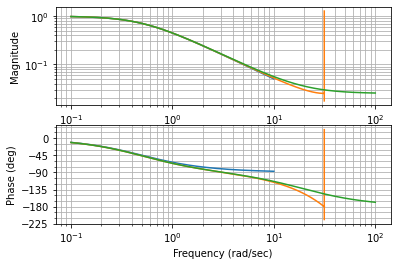

In [78]:
control.bode_plot(Gs);
control.bode_plot(Gz);
control.bode_plot(Gw);